### **RMSProp Explained**  

RMSProp (**Root Mean Square Propagation**) is an optimization algorithm that adapts the learning rate for each parameter based on the moving average of squared gradients. This helps stabilize training by reducing large oscillations in updates.  

---

### **Key Equations**  

#### **1. Moving Average of Squared Gradients**
$$
E_t = \beta E_{t-1} + (1 - \beta) g_t^2
$$
- **$ E_t $**: Updated moving average of squared gradients at step $ t $.  
- **$ E_{t-1} $**: Previous moving average of squared gradients.  
- **$ g_t^2 $**: Squared gradient at step $ t $.  
- **$ \beta $**: Decay factor (typically 0.9), controlling how much past values influence the average.  

💡 **Purpose**: Smooths gradient magnitudes to prevent drastic learning rate changes.

---

#### **2. Parameter Update Rule**
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E_t + \epsilon}} g_t
$$
- **$ \theta_t $**: Current parameter value.  
- **$ \theta_{t+1} $**: Updated parameter value.  
- **$ \eta $**: Learning rate.  
- **$ \epsilon $**: Small constant (e.g., $ 10^{-8} $) to prevent division by zero.  

💡 **Purpose**: Adjusts the learning rate dynamically, making updates smaller when past gradients are large.

---

### **How RMSProp Works Step-by-Step**
1. Compute the squared gradient $ g_t^2 $.
2. Update the moving average of squared gradients using $ E_t = \beta E_{t-1} + (1 - \beta) g_t^2 $.
3. Compute the adaptive learning rate as $ \frac{\eta}{\sqrt{E_t + \epsilon}} $.
4. Update the parameter $ \theta $ using the new scaled learning rate.

---

### **Why RMSProp is Useful**
- 🚀 **Prevents large oscillations** by normalizing the gradient step size.  
- 🎯 **Works well for deep learning** (especially for RNNs & CNNs).  
- 🔧 **Self-adjusting learning rate** helps in non-stationary problems.  

### **Comparison with Other Optimizers**
| Optimizer | Key Feature | Best Use Case |
|-----------|------------|--------------|
| SGD | Simple, fixed learning rate | General optimization |
| Momentum | Adds inertia to updates | Faster convergence |
| RMSProp | Adaptive learning rate, stabilizes training | RNNs, deep learning |
| Adam | Combines RMSProp & Momentum | Most deep learning tasks |



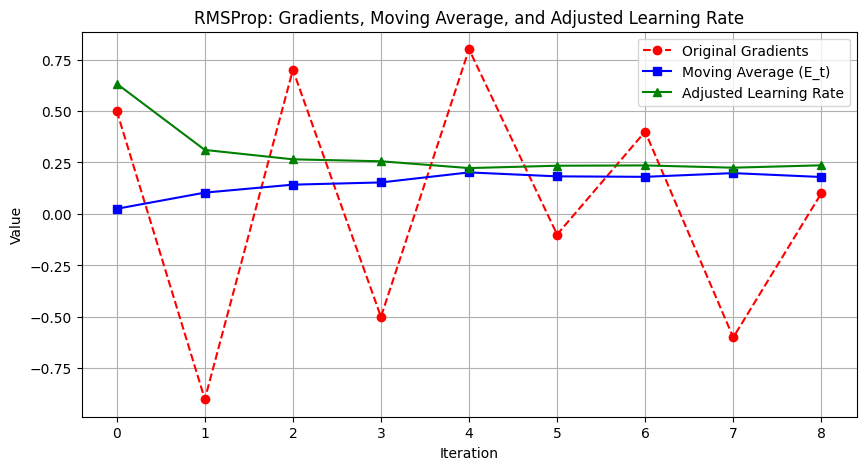

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
eta = 0.1      # Learning rate
beta = 0.9     # Decay factor
epsilon = 1e-8 # Small constant to avoid division by zero

# Sample gradient values (simulating a noisy gradient descent)
gradients = np.array([0.5, -0.9, 0.7, -0.5, 0.8, -0.1, 0.4, -0.6, 0.1])

# Initialize variables
E_prev = 0  # Previous moving average of squared gradients
theta = 1.0  # Initial parameter value
theta_updates = [theta]  # Track updates
E_values = []  # Store moving average of squared gradients
adjusted_learning_rates = []  # Track adjusted learning rates

# Apply RMSProp updates
for g_t in gradients:
    E_curr = beta * E_prev + (1 - beta) * g_t**2  # Update moving average
    adjusted_eta = eta / np.sqrt(E_curr + epsilon)  # Calculate adjusted learning rate
    theta = theta - adjusted_eta * g_t  # Update parameter
    theta_updates.append(theta)
    E_values.append(E_curr)  # Store moving average
    adjusted_learning_rates.append(adjusted_eta)  # Store adjusted learning rate
    E_prev = E_curr  # Set current moving average as previous for next step

# Plot the original gradients, moving averages, and adjusted learning rates
plt.figure(figsize=(10, 5))
plt.plot(gradients, marker='o', linestyle='--', color='r', label="Original Gradients")
plt.plot(E_values, marker='s', linestyle='-', color='b', label="Moving Average (E_t)")
plt.plot(adjusted_learning_rates, marker='^', linestyle='-', color='g', label="Adjusted Learning Rate")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("RMSProp: Gradients, Moving Average, and Adjusted Learning Rate")
plt.legend()
plt.grid()
plt.show()


